# PH3022 - Machine Learning and Neural Computation - Assignment_06

# Q1

# Q1.a

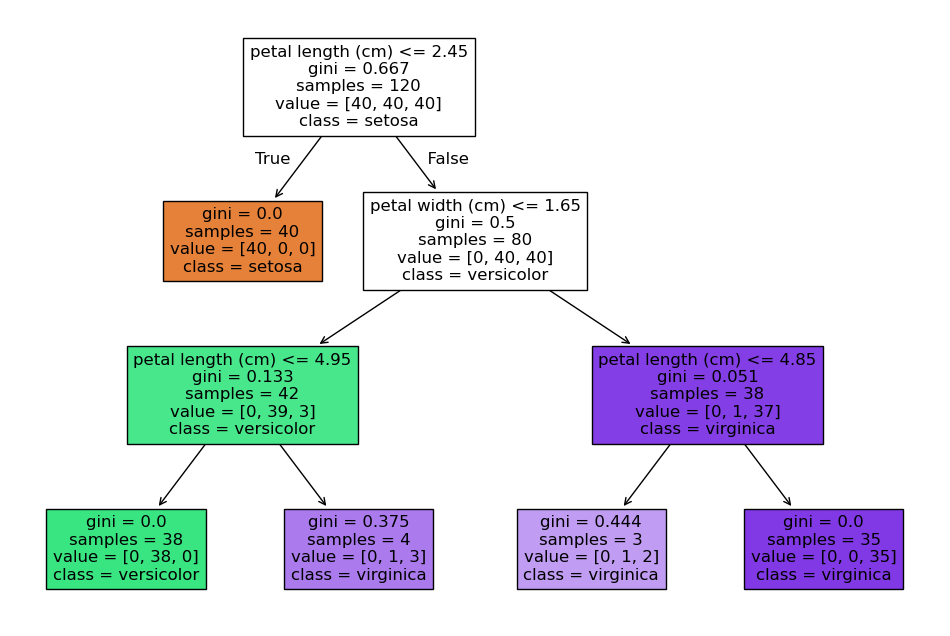

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

# Q1.b

i. Decision nodes are the internal nodes of the tree where a feature is tested (for example, petal length ≤ 2.45).

ii. Leaf nodes are the final nodes that give the class prediction (Setosa, Versicolor, or Virginica).

In the plotted decision tree:
- Nodes with split conditions are decision nodes
- Nodes with class labels only are leaf nodes

# Q1.c

The depth of a decision tree is the maximum number of levels from the root node to any leaf node.

In this model, since max_depth = 3, the depth of the decision tree is 3.

In [35]:
dt.get_depth()

3

# Q1.d

In [36]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred = dt.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("i. Confusion Matrix\n")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nii. Classification Report\n")
print(cr)

i. Confusion Matrix

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

ii. Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



The model shows high accuracy with minor misclassification in the versicolor class.

# Q2

# Q2.a

AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak classifiers to form a strong classifier.

It works by training models sequentially, where each new model focuses more on the samples that were misclassified by the previous models.

Misclassified samples are given higher weights, and the final prediction is made using a weighted majority vote of all models.

# Q2.b

In [37]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm="SAMME",
    random_state=42
)

# Train model
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

# Q2.c

In [38]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearch with SAMME algorithm specified
grid = GridSearchCV(
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        algorithm="SAMME",
        random_state=42
    ),
    param_grid,
    cv=5
)

# Fit model
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


# Q2.d

In [39]:
# Confusion Matrix
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Q2.e

<table border="1" cellpadding="6" cellspacing="0">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Performance</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.97</td>
    <td>High accuracy but may overfit</td>
  </tr>
  <tr>
    <td>Optimized AdaBoost</td>
    <td>0.97</td>
    <td>Comparable performance to Decision Tree</td>
  </tr>
</table>

# Q3

# Q3.a

Gradient Boosting is an ensemble learning method that builds models sequentially.
- Starts with a simple model
- Each new model learns from the errors (residuals) of the previous model
- Errors are minimized using gradient descent
- Final prediction is the sum of all weak learners
- Improves accuracy step by step

# Q3.b

In [40]:
# Import required libraries
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Q3.c

In [41]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 3, 5]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

best_gb = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Q3.d

In [42]:
# Confusion Matrix
y_pred = best_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Q3.e

<table border="1" cellpadding="6" cellspacing="0">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Performance</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.97</td>
    <td>Moderate</td>
  </tr>
  <tr>
    <td>AdaBoost</td>
    <td>0.97</td>
    <td>High</td>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td>0.97</td>
    <td>Very High</td>
  </tr>
</table>

# Q4

# Q4.a

Random Forest is an ensemble learning algorithm that builds many decision trees.
- Each tree is trained on a random subset of data
- Each split uses a random subset of features
- Trees work independently
- Final prediction is made by majority voting
- Reduces overfitting and improves accuracy

# Q4.b

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Q4.c

In [44]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


# Q4.d

In [46]:
# Confusion Matrix
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Q4.e

<table border="1" cellpadding="6" cellspacing="0">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Remarks</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.97</td>
    <td>Overfitting</td>
  </tr>
  <tr>
    <td>AdaBoost</td>
    <td>0.97</td>
    <td>good</td>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td>0.97</td>
    <td>Very strong</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.97</td>
    <td>Most stable</td>
  </tr>
</table>